In [224]:
#All the codes in this file are retrieved from Social Media and Network Analytics, Lab Notes, except for the codes from analysis part that come from the author
# importing packages and nltk data libraries
import string
import json
import codecs
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import ngrams
nltk.download('vader_lexicon')
from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
from nltk import ngrams
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [226]:
%load_ext autoreload
%autoreload 1
%aimport RedditProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
redditFile = 'Movie_AllComments_Final.json'

## N-grams - Bigrams

In [230]:
# In this process, the emoji will be removed because I tried to included in the first place but it appeared them same emoji that showed in data preprocessing
# and I did not get more useful information, so I decided to remove them. Initially I kept it because emoji is useful for social media data, 
#so I thought that somehow I might know how people think or express their emoiton through emoji
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002700-\U000027BF"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [232]:
import json
import re
import nltk
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# NLTK downloads (if not done yet)
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')

fJsonFileName = 'Movie_AllComments_Final.json'

freqNum = 50

tweetTokenizer = TweetTokenizer()
punctuation = list(string.punctuation)
custom_stopwords = stopwords.words('english') + punctuation + [
    'rt', 'via', '...', '"', "'", '`', '’', 'http', 'https', 'www', '…', '”', '“',
    'even', 'im', 'would', 'could'
]

lemmatizer = WordNetLemmatizer()

def processText(text, tokenizer, lemmatizer, stopwords):
    tokens = tokenizer.tokenize(text.lower())
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and not token.isdigit()]

all_bigrams = []

with open(fJsonFileName, 'r', encoding='utf-8') as f:
    redditDump = json.load(f)

for submission in redditDump['submissions']:
    postDate = pd.to_datetime(submission['created']) 

    title_text = submission.get('title', '')
    title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
    title_text = remove_emojis(title_text)
    tokens_title = processText(title_text, tweetTokenizer, lemmatizer, custom_stopwords)

    all_comment_tokens = []
    def collect_tokens_from_comments(comments):
        for comment in comments:
            comment_text = comment.get('body', '')
            comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
            comment_text = remove_emojis(comment_text)
            tokens = processText(comment_text, tweetTokenizer, lemmatizer, custom_stopwords)
            all_comment_tokens.extend(tokens)
            # recursively collect from replies
            if 'replies' in comment and comment['replies']:
                collect_tokens_from_comments(comment['replies'])

    collect_tokens_from_comments(submission.get('comments', []))

    combined_tokens = tokens_title + all_comment_tokens

    bigrams = list(ngrams(combined_tokens, 2))
    all_bigrams.extend(bigrams)

bigram_counts = Counter(all_bigrams)

print("\nTop 50 Most Common Bigrams:")
for bigram, count in bigram_counts.most_common(freqNum):
    print(f"{bigram}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Top 50 Most Common Bigrams:
('snow', 'white'): 3998
('live', 'action'): 1763
('look', 'like'): 842
('gif', 'giphy'): 804
('feel', 'like'): 751
('gal', 'gadot'): 695
('action', 'remake'): 477
('removed', 'removed'): 455
('rachel', 'zegler'): 397
('evil', 'queen'): 369
('year', 'old'): 346
('box', 'office'): 328
('make', 'sense'): 312
('disney', 'movie'): 289
('little', 'mermaid'): 267
('movie', 'like'): 256
('year', 'ago'): 249
('little', 'people'): 243
('dont', 'think'): 241
('lion', 'king'): 233
('much', 'better'): 232
('good', 'movie'): 220
('disney', 'princess'): 218
('beauty', 'beast'): 215
('lot', 'people'): 214
('lilo', 'stitch'): 212
('see', 'movie'): 209
('want', 'see'): 206
('people', 'like'): 201
('go', 'see'): 200
('cgi', 'dwarf'): 198
('last', 'year'): 196
('first', 'time'): 194
('dont', 'know'): 193
('sound', 'like'): 193
('li', 'shang'): 190
('fairy', 'tale'): 190
('movie', 'made'): 187
('original', 'movie'): 185
('angry', 'men'): 183
('pretty', 'much'): 180
('seems', 'l

In [17]:
import json
import re
import nltk
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# NLTK downloads (if not done yet)
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')

fJsonFileName = 'Movie_AllComments_Final.json'

tweetTokenizer = TweetTokenizer()
punctuation = list(string.punctuation)
custom_stopwords = stopwords.words('english') + punctuation + [
    'rt', 'via', '...', '"', "'", '`', '’', 'http', 'https', 'www', '…', '”', '“',
    'even', 'im', 'would', 'could'
]

lemmatizer = WordNetLemmatizer()

def processText(text, tokenizer, lemmatizer, stopwords):
    tokens = tokenizer.tokenize(text.lower())
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and not token.isdigit()]

all_trigrams = []

with open(fJsonFileName, 'r', encoding='utf-8') as f:
    redditDump = json.load(f)

for submission in redditDump['submissions']:
    postDate = pd.to_datetime(submission['created'])  # no unit='s', it's string datetime

    title_text = submission.get('title', '')
    title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
    title_text = remove_emojis(title_text)
    tokens_title = processText(title_text, tweetTokenizer, lemmatizer, custom_stopwords)

    all_comment_tokens = []
    def collect_tokens_from_comments(comments):
        for comment in comments:
            comment_text = comment.get('body', '')
            comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
            comment_text = remove_emojis(comment_text)
            tokens = processText(comment_text, tweetTokenizer, lemmatizer, custom_stopwords)
            all_comment_tokens.extend(tokens)
            # recursively collect from replies
            if 'replies' in comment and comment['replies']:
                collect_tokens_from_comments(comment['replies'])

    collect_tokens_from_comments(submission.get('comments', []))

    combined_tokens = tokens_title + all_comment_tokens

    trigrams = list(ngrams(combined_tokens, 3))
    all_trigrams.extend(trigrams)

trigram_counts = Counter(all_trigrams)

print("\nTop 50 Most Common Trigrams:")
for trigrams, count in trigram_counts.most_common(freqNum):
    print(f"{trigrams}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Top 50 Most Common Trigrams:
('live', 'action', 'remake'): 472
('removed', 'removed', 'removed'): 371
('live', 'action', 'movie'): 135
('snow', 'white', 'movie'): 121
('like', 'snow', 'white'): 116
('cabinet', 'dr', 'caligari'): 112
('disney', 'live', 'action'): 104
('original', 'snow', 'white'): 100
('skin', 'white', 'snow'): 81
('live', 'action', 'version'): 79
('happened', 'one', 'night'): 74
('west', 'side', 'story'): 71
('snow', 'white', 'look'): 64
('think', 'snow', 'white'): 62
('action', 'snow', 'white'): 59
('snow', 'white', 'huntsman'): 58
('version', 'snow', 'white'): 57
('live', 'action', 'snow'): 56
('snow', 'white', 'seven'): 55
('live', 'action', 'adaptation'): 49
('please', 'take', 'time'): 48
('take', 'time', 'review'): 48
('modmail', 'https://www.reddit.com/message/compose?to=%2fr%2ffantasy', 'follow-up'): 48
('https://www.reddit.com/message/compose?to=%2fr%2ffantasy', 'follow-up', 'question'): 48
('live', 'action', 'film'): 47
('look', 'much', 'better'): 46
('arseni

## Approach 1 - Word Counting

In [64]:
#From Social Media and Network Analytics, Lab Notes 
def computeSentiment(lTokens, setPosWords, setNegWords):
    """
    Compute the overall sentiment of the list of tokens in lTokens, using the countWordSentimentAnalysis approach.
    
    @param lTokens: List of tokens to calculate the overall sentiment for.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    
    @returns Sentiment score for lTokens.
    """           
    posNum = len([tok for tok in lTokens if tok in setPosWords])


    negNum = len([tok for tok in lTokens if tok in setNegWords])

    sentiment = posNum - negNum
                
    return sentiment

In [66]:
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    """
    Print out the tokens in different colours, according to sentiment.
    If positive, in red.
    If negative, in blue.
    Otherwise no colouring.
    
    @param lTokens: List of tokens to print and colour.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    @param sentiment: Sentiment score of list of tokens.
    """
        
    for token in lTokens:
        if token in setPosWords:
            print(Fore.BLUE + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.RED + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

In [136]:
#From the author and Social Media and Network Analytics, Lab Notes 

def countWordSentimentAnalysis(setPosWords, setNegWords, sTweetsFilename, bPrint, processText):
    """
    Perform basic sentiment analysis on Reddit data (title + comments).

    @param setPosWords: set of positive sentiment words
    @param setNegWords: set of negative sentiment words
    @param sTweetsFilename: name of input file containing a JSON-formatted dump
    @param bPrint: whether to print the stream of tokens and sentiment (uses colorama)
    @param redditProcessor: RedditProcessing object, used to pre-process each piece of text

    @returns: list of reddit posts in the format [date, sentiment]
    """
    lSentiment_count = []
    sentAnalyser = SentimentIntensityAnalyzer()

    # Load Reddit data
    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'])

            title_text = submission.get('title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_text = remove_emojis(title_text)
            lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_count.append([postDate, sentiment_title])
            

            if bPrint:
                printColouredTokens(lTokens_title, setPosWords, setNegWords, sentiment_title)

            all_comment_tokens = []
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                lTokens_comment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)
                lSentiment_count.append([postDate, sentiment_comment])

                if bPrint:
                    printColouredTokens(lTokens_comment, setPosWords, setNegWords, sentiment_comment)

    return lSentiment_count

## Approach 2 - Vader

In [138]:
#From Social Media and Network Analytics, Lab Notes 
def vaderPrintTokens(dSentimentScores):
    """
    Print out the tokens and sentiment score.
    
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [178]:
#From Social Media and Network Analytics, Lab Notes 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def vaderSentimentAnalysis(sTweetsFilename, bPrint=False):
    """
    Use VADER lexicon for sentiment analysis on Reddit data.

    @param sTweetsFilename: name of input file containing a JSON-formatted Reddit dump
    @param bPrint: whether to print text and sentiment scores

    @returns: list of Reddit posts in the format [date, sentiment_score]
    """
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    # Load Reddit data
    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'])

            # ----- VADER on raw submission title -----
            title_text = submission.get('title', '')
            title_text_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_text_clean = remove_emojis(title_text_clean)
            dSentimentScores = sentAnalyser.polarity_scores(title_text_clean)
            lSentiment_vader.append([postDate, dSentimentScores['compound'], title_text_clean])

            if bPrint:
                print(f"[Title] {title_text_clean}")
                print("Sentiment:", dSentimentScores)

            # ----- VADER on each comment -----
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                dSentimentScores = sentAnalyser.polarity_scores(comment_clean)
                lSentiment_vader.append([postDate, dSentimentScores['compound'], comment_clean])

                if bPrint:
                    print(f"[Comment] {comment_clean}")
                    print("Sentiment:", dSentimentScores)

    return lSentiment_vader

In [128]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# input file of set of reddit posts (json format)
redditFile = 'Movie_AllComments_Final.json'
flagPrint = True
# specify the approach to take, one of [count, vader]
# change this to use a different sentiment approach
approach = 'vader'

In [130]:
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    lPosWords = [line.strip() for line in fPos]
setPosWords = set(lPosWords)

lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    lNegWords = [line.strip() for line in fNeg]
setNegWords = set(lNegWords)

In [249]:
# #Show result - # because the result is too long and the screen is frozen
# with open(redditFile, 'r') as f:
#     redditData = json.load(f)

# lSentiment = []
# if approach == 'count':
#     lSentiment_count = countWordSentimentAnalysis(setPosWords, setNegWords, redditFile, flagPrint, processText)
# elif approach == 'vader':
#     lSentiment_vader = vaderSentimentAnalysis(redditFile, flagPrint)

## For Analysis Part

In [166]:
# Run overall sentiment analysis
lSentiment_vader = vaderSentimentAnalysis('Movie_AllComments_Final.json', bPrint=False)

# Extract compound scores
compound_scores = [entry[1] for entry in lSentiment_vader]

if compound_scores:
    overall_sentiment = sum(compound_scores) / len(compound_scores)
    print(f"Overall Sentiment Score: {overall_sentiment:.4f}")

    if overall_sentiment >= 0.05:
        label = "Positive"
    elif overall_sentiment <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    
    print(f"Overall Sentiment: {label}")
else:
    print("No sentiment scores available.")

Overall Sentiment Score: 0.1152
Overall Sentiment: Positive


In [180]:
lSentiment_vader = vaderSentimentAnalysis("Movie_AllComments_Final.json")

sorted_by_sentiment = sorted(lSentiment_vader, key=lambda x: x[1], reverse=True)
top3_positive = sorted_by_sentiment[:3]

# Remove duplicates based on text content (assumes structure: [date, score, text])
unique_sentiments = []
seen_texts = set()

for entry in lSentiment_vader:
    if len(entry) < 3:
        continue 
    text = entry[2]
    if text not in seen_texts:
        unique_sentiments.append(entry)
        seen_texts.add(text)

sorted_by_sentiment = sorted(lSentiment_vader, key=lambda x: x[1], reverse=True)
top3_positive = sorted_by_sentiment[:3]

sorted_by_sentiment = sorted(unique_sentiments, key=lambda x: x[1])

# Get top 3 negative
top3_negative = sorted_by_sentiment[:3]


In [182]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import json
import re

def vaderSentimentAnalysis(sTweetsFilename, bPrint=False):
    """
    Use VADER lexicon for sentiment analysis on Reddit data.

    @param sTweetsFilename: name of input file containing a JSON-formatted Reddit dump
    @param bPrint: whether to print text and sentiment scores

    @returns: list of Reddit posts in the format [date, compound_score, original_text]
    """
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    # Load Reddit data
    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'])

            title_text = submission.get('title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_text = remove_emojis(title_text)
            lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_vader.append([postDate, sentiment_title])

            if bPrint:
                print(f"[Title] {title_text_clean}")
                print("Sentiment:", dSentimentScores)

            all_comment_tokens = []
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                comment_text = remove_emojis(comment_text)
                lTokens_comment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)
                lSentiment_vader.append([postDate, sentiment_comment])

                if bPrint:
                    print(f"[Comment] {comment_clean}")
                    print("Sentiment:", dSentimentScores)

    return lSentiment_vader

In [184]:
# Display Top 3 Positive Sentiments
print("\nTop 3 Positive Sentiments:")
for i, entry in enumerate(top3_positive, 1):
    date, score, text = entry
    print(f"{i}. Date: {date} | Compound Score: {score:.4f}")
    print(f"   Text: {text}\n")


Top 3 Positive Sentiments:
1. Date: 2025-03-21 01:55:20 | Compound Score: 0.9995
   Text: Alright, I enjoyed it. It wasn't an AMAZING movie, but I didn't regret watching it. 

My wife is a Disney adult and Snow White is her favorite princess. Having seen the original Disney's Snow White so many god damn times, let me tell you it's pretty fucking rough. The story is also all just this happens and this happens, very little depth in my opinion. 

As my wife's favorite princess is Snow White and she is a Disney adult, let me tell you, this movie was a fucking breathe of fresh air. 

In my opinion it adds depth and background to more of the characters and the original story makes more sense. Prince Charming and loves true kiss makes some fucking sense. They built on a relationship beforehand. 

Rachel Ziegler was right, they wanted to make Snow White more empowered, a strong female character because let's be honest as the first Disney Princess she has very little depth and pretty subservie

In [186]:
# Display Top 3 Negative Sentiments
print("Top 3 Negative Sentiments:")
for i, entry in enumerate(top3_negative, 1):
    date, score, text = entry
    print(f"{i}. Date: {date} | Compound Score: {score:.4f}")
    print(f"   Text: {text}\n")

Top 3 Negative Sentiments:
1. Date: 2025-03-04 01:33:43 | Compound Score: -0.9943
   Text: Frollo by far. Gothel would be my second. All the other villains being listed were ruthless because they wanted power and control, and some of them you can understand looking at the background that its a very gray area of why they turned bad - Scar, Jafar, Ursula, etc.

Frollo has a smaller amount of power compared to others in that he can only control a city but there are others who have more authority over him (archbishop). But its his racism and lewd ass pedo self that is even more gross and the fact he uses religion to justify his actions, kinda what we see happening politically now with a lot of Christians being very un-Christian to other people and minorities. There is no logic in what he does to the other characters Quasimodo (maybe hell be helpful someday…after I offered his mom and the archbishop caught me trying to throw him down a well, and the moment he defies me locking him away - le

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


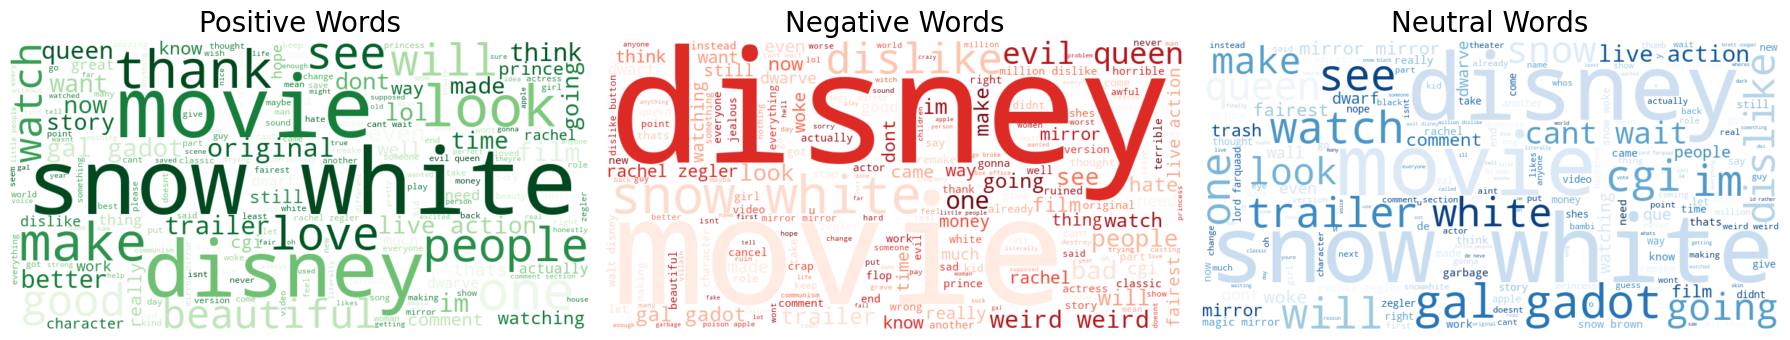

In [268]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load JSON data
with open('Youtube_combined_Final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Step 1: Extract all comment texts (including replies if available)
all_comments = []

for video in data:
    if 'Comments' in video:
        for comment in video['Comments']:
            # Add top-level comment
            if 'text' in comment:
                all_comments.append(comment['text'])
            # Check for replies
            if 'Replies' in comment and isinstance(comment['Replies'], list):
                for reply in comment['Replies']:
                    if 'text' in reply:
                        all_comments.append(reply['text'])

# Step 2: Convert to DataFrame
df = pd.DataFrame({'Text': all_comments})

# Step 3: Sentiment analysis
vader = SentimentIntensityAnalyzer()

def processText(text):
    text = re.sub(r"[^\w\s]", "", str(text).lower())
    return text.split()

# Step 4: Sort words by sentiment
pos_words, neg_words, neutral_words = [], [], []

for comment in df['Text']:
    score = vader.polarity_scores(comment)['compound']
    words = processText(comment)
    if score >= 0.05:
        pos_words.extend(words)
    elif score <= -0.05:
        neg_words.extend(words)
    else:
        neutral_words.extend(words)

# Step 5: Generate word clouds safely
def safe_wordcloud(text, colormap):
    return WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text) if text.strip() else None

wordcloud_pos = safe_wordcloud(" ".join(pos_words), 'Greens')
wordcloud_neg = safe_wordcloud(" ".join(neg_words), 'Reds')
wordcloud_neutral = safe_wordcloud(" ".join(neutral_words), 'Blues')

# Step 6: Plot
plt.figure(figsize=(18, 12))

if wordcloud_pos:
    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Positive Words', fontsize=20)
    plt.axis('off')

if wordcloud_neg:
    plt.subplot(1, 3, 2)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Negative Words', fontsize=20)
    plt.axis('off')

if wordcloud_neutral:
    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.title('Neutral Words', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [251]:
df = pd.read_json('Movie_AllComments_Final.json')

In [253]:
with open('Movie_AllComments_Final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data['submissions'])

vader = SentimentIntensityAnalyzer()

In [255]:
with open('Movie_AllComments_Final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data['submissions'])

def processText(text):
    text = re.sub(r"[^\w\s]", "", text.lower()) 
    return text.split()

def word_count_sentiment(text):
    tokens = processText(str(text))
    pos_count = sum(1 for word in tokens if word in posWordFile)
    neg_count = sum(1 for word in tokens if word in negWordFile)
    total = len(tokens)
    return pd.Series({'pos_count': pos_count, 'neg_count': neg_count, 'total_words': total})

In [257]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_words = []
neg_words = []
neutral_words = []

posWordFile = 'positive-words.txt'
negWordFile = 'negative-words.txt'

with open('positive-words.txt', 'r', encoding='ISO-8859-1') as f:
    posWordFile = set(
        line.strip().lower()
        for line in f
        if line.strip() and not line.startswith(';')
    )

# Load negative words
with open('negative-words.txt', 'r', encoding='ISO-8859-1') as f:
    negWordFile = set(
        line.strip().lower()
        for line in f
        if line.strip() and not line.startswith(';')
    )

# Loop through each list of comments
for comment_list in df['comments']:
    for comment in comment_list:
        text = comment.get('body', '')
        tokens = processText(text)
        for word in tokens:
            if word in posWordFile:
                pos_words.append(word)
            elif word in negWordFile:
                neg_words.append(word)
            else:
                neutral_words.append(word)


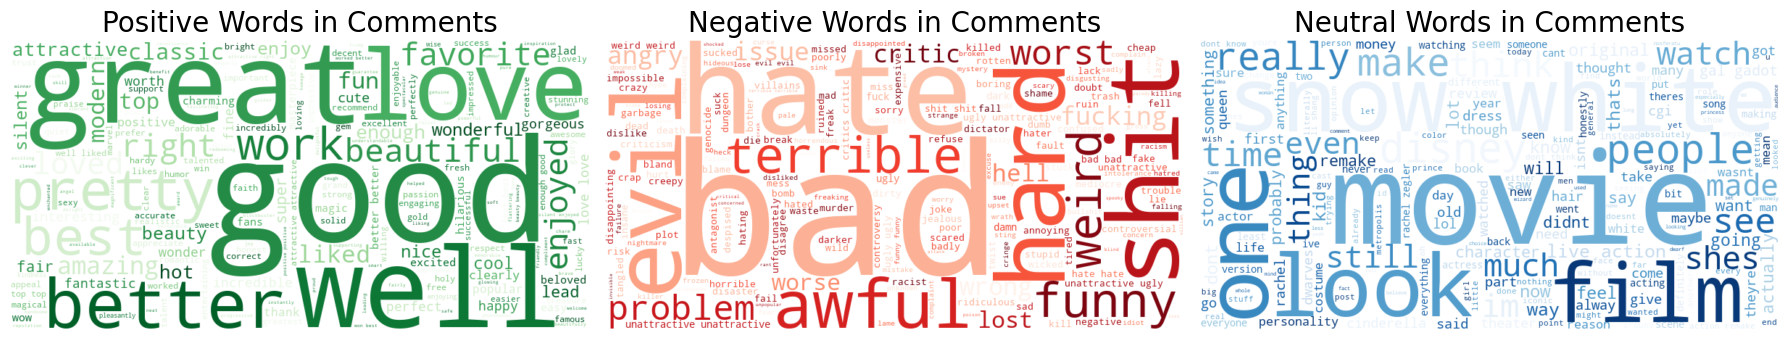

In [259]:
# Convert lists to strings
pos_text = " ".join(pos_words)
neg_text = " ".join(neg_words)
neutral_text = " ".join(neutral_words)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Words in Comments', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Words in Comments', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Words in Comments', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

## Visualization comparing two approaches of sentiment analysis

In [261]:
def vaderSentimentAnalysis(sTweetsFilename, bPrint=False):
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

    for submission in redditDump['submissions']:
        postDate = pd.to_datetime(submission['created'])

        title_text = submission.get('title', '')
        title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
        title_text = remove_emojis(title_text)

        vader_score = sentAnalyser.polarity_scores(title_text)['compound']
        lSentiment_vader.append([postDate, vader_score])

        if bPrint:
            print(f"[Title] {title_text}")
            print("Sentiment:", vader_score)

        for comment in submission.get('comments', []):
            comment_text = comment.get('body', '')
            comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
            comment_text = remove_emojis(comment_text)

            vader_score = sentAnalyser.polarity_scores(comment_text)['compound']
            lSentiment_vader.append([postDate, vader_score])

            if bPrint:
                print(f"[Comment] {comment_text}")
                print("Sentiment:", vader_score)

    return lSentiment_vader


In [263]:
def countWordSentimentAnalysis(setPosWords, setNegWords, sTweetsFilename, bPrint, processText):
    lSentiment_count = []
    sentAnalyser = SentimentIntensityAnalyzer()

    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'])

            title_text = submission.get('title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_text = remove_emojis(title_text)
            lTokens_title = processText(title_text)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_count.append([postDate, sentiment_title])

            if bPrint:
                print(f"[Title] {title_text_clean}")
                print("Sentiment:", dSentimentScores)

            all_comment_tokens = []
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                comment_text = remove_emojis(comment_text)
                lTokens_comment = processText(comment_text)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)
                lSentiment_count.append([postDate, sentiment_comment])

                if bPrint:
                    print(f"[Comment] {comment_clean}")
                    print("Sentiment:", dSentimentScores)

    return lSentiment_count

/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_5970/391651203.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_vader_resampled = df_vader.resample('M').mean()


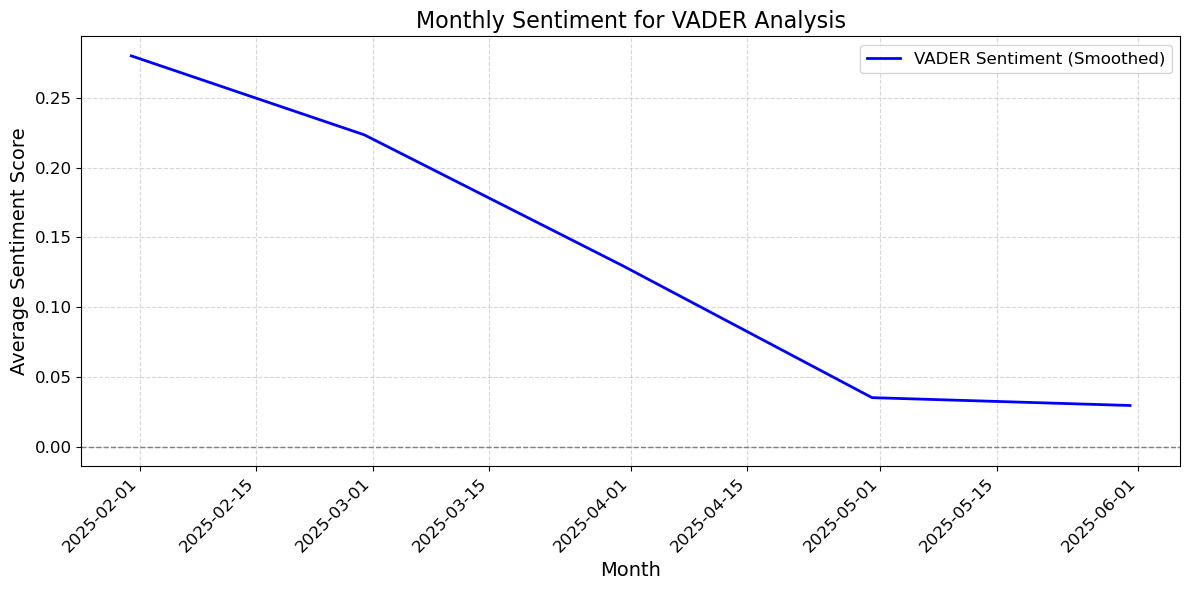

In [265]:
# Ensure you already have a valid list of [date, sentiment] pairs from your analysis
lSentiment_vader = vaderSentimentAnalysis(redditFile, bPrint=False)

# Convert to DataFrame
df_vader = pd.DataFrame(lSentiment_vader, columns=['date', 'sentiment'])
df_vader['date'] = pd.to_datetime(df_vader['date'], errors='coerce')
df_vader.dropna(subset=['date'], inplace=True)
df_vader.set_index('date', inplace=True)

# Resample and smooth
df_vader_resampled = df_vader.resample('M').mean()
df_vader_resampled['smoothed'] = df_vader_resampled['sentiment'].rolling(window=2, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_vader_resampled.index, df_vader_resampled['smoothed'], label='VADER Sentiment (Smoothed)', color='blue', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Neutral line

plt.title('Monthly Sentiment for VADER Analysis', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
